# Introduction

At the end of this lesson, you will be able to write TensorFlow and Keras code to use one of the best models in computer vision.

# Lesson


# Sample Code

### Choose Images to Work With

In [18]:
from os.path import join

image_dir = 'input/malware-identification/train/'

img_paths = [join(image_dir, filename) for filename in 
                           ['x86__64__lsb__unix-system-v__clang-3.8.0__O0__no-obf__unstripped__BASHLITE-1.0__client.jpg',
                            'x86__64__lsb__unix-system-v__clang-3.8.0__O0__no-obf__unstripped__BASHLITE-1.0__server.jpg',
                            'x86__64__lsb__unix-system-v__clang-3.8.0__O0__no-obf__unstripped__BASHLITE-lizkebab__client.jpg',
                            'x86__64__lsb__unix-system-v__clang-3.8.0__O0__no-obf__unstripped__BASHLITE-lizkebab__server.jpg']]

### Function to Read and Prep Images for Modeling

In [19]:
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

image_size = 224

# def read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):
#     imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
#     img_array = np.array([img_to_array(img) for img in imgs])
#     output = preprocess_input(img_array)
#     return(output)

In [20]:
import tensorflow as tf
print(tf.__version__)


2.12.0


### Create Model with Pre-Trained Weights File. Make Predictions

In [21]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the ResNet50 model with pre-trained weights
my_model = ResNet50(weights='imagenet', include_top=True)
def read_and_prep_images(img_paths):
    # Initialize an empty list to store preprocessed images
    preprocessed_images = []
    
    for img_path in img_paths:
        # Load and preprocess each image
        img = load_img(img_path, target_size=(224, 224))  # ResNet50 expects 224x224 input size
        img = img_to_array(img)
        img = preprocess_input(img)  # Apply ResNet50-specific preprocessing
        
        preprocessed_images.append(img)
    
    return tf.convert_to_tensor(preprocessed_images)




test_data = read_and_prep_images(img_paths)
preds = my_model.predict(test_data)

1/1 [==============================] - 3s 3s/step


### Visualize Predictions

In [22]:
import json

def decode_predictions(preds, top=5, class_list_path='../input/resnet50/imagenet_class_index.json'):
  """Decodes the prediction of an ImageNet model.
  Arguments:
      preds: Numpy tensor encoding a batch of predictions.
      top: integer, how many top-guesses to return.
      class_list_path: Path to the canonical imagenet_class_index.json file
  Returns:
      A list of lists of top class prediction tuples
      `(class_name, class_description, score)`.
      One list of tuples per sample in batch input.
  Raises:
      ValueError: in case of invalid shape of the `pred` array
          (must be 2D).
  """
  if len(preds.shape) != 2 or preds.shape[1] != 1000:
    raise ValueError('`decode_predictions` expects '
                     'a batch of predictions '
                     '(i.e. a 2D array of shape (samples, 1000)). '
                     'Found array with shape: ' + str(preds.shape))
  CLASS_INDEX = json.load(open(class_list_path))
  results = []
  for pred in preds:
    top_indices = pred.argsort()[-top:][::-1]
    result = [tuple(CLASS_INDEX[str(i)]) + (pred[i],) for i in top_indices]
    result.sort(key=lambda x: x[2], reverse=True)
    results.append(result)
  return results

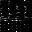

[('n06785654', 'crossword_puzzle', 0.89318836), ('n03733281', 'maze', 0.021550827), ('n03196217', 'digital_clock', 0.015879782)]


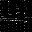

[('n06785654', 'crossword_puzzle', 0.93172127), ('n03197337', 'digital_watch', 0.017340586), ('n04149813', 'scoreboard', 0.00970967)]


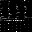

[('n06785654', 'crossword_puzzle', 0.9514491), ('n03733281', 'maze', 0.010306943), ('n03197337', 'digital_watch', 0.008671506)]


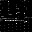

[('n06785654', 'crossword_puzzle', 0.83726203), ('n03197337', 'digital_watch', 0.050591014), ('n03196217', 'digital_clock', 0.027419955)]


In [23]:
# from learntools.deep_learning.decode_predictions import decode_predictions
from IPython.display import Image, display

most_likely_labels = decode_predictions(preds, top=3, class_list_path='input/resnet50/imagenet_class_index.json')

for i, img_path in enumerate(img_paths):
    display(Image(img_path))
    print(most_likely_labels[i])

In [15]:
from learntools.deep_learning import my_module


ModuleNotFoundError: No module named 'learntools.deep_learning'

# Exercise
Now you are ready to **[use a powerful TensorFlow model](https://www.kaggle.com/kernels/fork/3349935)** yourself.